# Wrangling data and creating new dataframe from wildfire and greenhouse gas data, analyse correlation between the variables by heatmap, and correlation plots with seaborn

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


# US Wildfire data 

Note: For efficiency purposes, the next three cells can be skipped if the CSV file: '..... ..../wildfire.csv' has already been created. 
In that case, the cell dfWildfires = pd.read_csv('...'), which reads the wildfire csv file can be activated next. 

In [2]:
import sqlite3

US wildfire data is contained in a sqlite database, which was orginally downlaoded from Kaggle. URL: https://www.kaggle.com/rtatman/188-million-us-wildfires, last accessed: 25-01-2021. 

The sqlite query is readed into a pandas Dataframe, a process that usually takes minutes. 
By giving the query a variable name, and later calling that name in a display method, verifies that data from the sqlite database is stored by means of the SQL query into the dataframe. 

In [3]:
file = '/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/FPA_FOD_20170508.sqlite'

con = sqlite3.connect(file)
df = pd.read_sql_query("SELECT * FROM fires", con) 

display(df)
print(df.head())
con.close()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,None,None,None,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


   OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...    

In [4]:
df.to_csv('/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/wildfire.csv')

In [2]:
file = '/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/wildfire.csv'
wildfire_data = pd.read_csv(file,index_col=0, parse_dates=True)


/Users/stevenkraamwinkel/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Below is the full dataset in CSV file. It contains wildfire data from wildfires that occurred in all states of the USA (Alaska and Hawaii excluded) between 01-01-1992 and 31-12-2015. 

In [3]:
display(wildfire_data)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN,NaN,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


## Data explanation 
#### Same explanation as other notebook (correlating fire data with temperature data)
US wildfire data is a CSV file that is converted from a database of wildfires that occurred in the United States between 1992 and 2015. Data was collected from various reporting agencies on federal, state and local level. 

Since the original CSV file contains data from over more than 1.88 million wildfires in the USA, and each fire is specified over 40 columns, we have decided quickly to focus on only the most relevant data columns and rows. 

Goal of this research is to relate the number and size of wildfires to other variables like temperature, drought, and air pollution. Therefore, in this large CSV file, we focus on the columns FIRE_YEAR and FIRE_SIZE. Another notebook also analyses the causes of each wildfire and the exact state in which the wildfire took place, also analysing DATE_DISCOVERY, STATE_CAUSE_DESCR, and STATE. 

FIRE_YEAR = Calendar year in which the fire was discovered or confirmed to exist. \
FIRE_SIZE = Estimate of acres within the final perimeter of the fire. \
DATE_DISCOVERY = Date on which the fire was discovered or confirmed to exist. \
STATE_CAUSE_DESCR = Description of the (statistical) cause of the fire. \
STATE = Two-letter alphabetic code for the state in which the fire burned (or originated), based on the nominal designation in the fire report.


Out of these columns two new data columns were wrangled, 'fires per year' and 'average fire size' by means of groupby mechanisms. 

### Calculating the number of fires each year 

In [4]:
fires_per_year = wildfire_data.groupby('FIRE_YEAR')['OBJECTID'].nunique()

This groupby mechanism counted for each year the number of wildfires. With the .unique() method potential duplicate wildfires were not added to the wildfire count. 

In [5]:
display(fires_per_year)

FIRE_YEAR
1992     67975
1993     61989
1994     75955
1995     71472
1996     75574
1997     61450
1998     68370
1999     89363
2000     96416
2001     86587
2002     75656
2003     68261
2004     69279
2005     88604
2006    114004
2007     95573
2008     85378
2009     78325
2010     79889
2011     90552
2012     72769
2013     64780
2014     67753
2015     74491
Name: OBJECTID, dtype: int64

### Calculating the mean size (in acres) of a fire for each year

The code below displays from every wildfire the wildfire size in acres. 

In [6]:
wildfire_data['FIRE_SIZE']

0          0.10
1          0.25
2          0.10
3          0.10
4          0.10
           ... 
1880460    0.01
1880461    0.20
1880462    0.10
1880463    2.00
1880464    0.10
Name: FIRE_SIZE, Length: 1880465, dtype: float64

In [7]:
average_size_all_fires = wildfire_data['FIRE_SIZE'].mean()
display(average_size_all_fires)

74.520158339107

In [8]:
average_fire_size = wildfire_data.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()

In [9]:
display(average_fire_size)

FIRE_YEAR
1992     32.364222
1993     35.356208
1994     54.198875
1995     28.676755
1996     79.460604
1997     52.313024
1998     29.414983
1999     68.039342
2000     79.234760
2001     43.009601
2002     89.923580
2003     65.682790
2004    118.855760
2005    109.082041
2006     88.097768
2007     96.946091
2008     63.324652
2009     77.333752
2010     43.728864
2011    106.277026
2012    129.724037
2013     69.350145
2014     54.218860
2015    137.174526
Name: FIRE_SIZE, dtype: float64

# Greenhouse Gases emissions

The following dataset contains data about the greenhouse gases, that have been measured and collection between may 1983 and december 2008. 
SOURCE_URL: https://www.kaggle.com/econdata/climate-change, last accessed: 11-01-2021

In [10]:
greenhouse_data = '/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/climate_change.csv'

greenhouse_df = pd.read_csv(greenhouse_data, index_col=0, parse_dates=True, sep=';')
year_averages = greenhouse_df.groupby('Year').mean()
pd.options.display.float_format = '{:.3f}'.format


### DATA EXPLANATION

Global data of the concentration of the the five most common greenhouse gases in the atmosphere, and other important important factors contributing to climate change. 

CO2: Carbon Dioxide (CO2), produced by organisms, volcanoes, geysers, oxidation processes, but also by the combustion of wood and fossil fuels. \
CH4: Methane, and is the main component of natural gas, which is used as a fuel for cooking, house heating, and is also used in various industrial chemical processes. \
N2O: Nitrous Oxide, also known as laughing gas. Used primarily as a medicine for various medical treatments, but is also used as a fuel to increase engine power. \
CFC.11: Trichlorofluoromethane. A chemical liquid that boils to gas around room temperature. Was applied in many refrigerators and air conditioning systems. Because of its huge negative impact on the ozon layer, most countries agreed to stop producing it since the 1990's. \
CFC.12, full name: Dichlorodifluoromethane. A chemical gas, mostly used as a refigirant, and aerosol spray. For its negative effects comparable to CFC.11, the substance is banned from developed countries since 2010. \

MEI = multivariate El Nino Southern Oscillation index (MEI), a weather affect that affects global temperatures \
Aerosols: small particles in the atmosphere that absorb or reflect solar radiation. Main factors that determine the amount are desert winds, volcano eruptions, but also pollution from industry and transportation. \
Temp: the difference in degrees Celsius between the average global temperature in that period and the reference value. A positive value implies an increase in global temperature. 

In this research correlation between CO2, CH4, N2O, CFC.11, CFC.12, number of wildfires and the average size of a wildfire will be calculated and analyzed. 

DATA MEASUREMENT: \
CO2, CH4, and N2O in ppmv (parts per million by volume) \
CFC.11 and CFC.12 in ppbv (parts per billion by volume) 


In [11]:
display(year_averages)

,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,Aerosols,Temp
Year,,,,,,,,,
1983-01-01,8.500,0.959,342.869,1645.200,303.880,193.987,356.361,0.066,0.137
1984-01-01,6.500,-0.151,344.580,1656.119,304.702,201.167,367.794,0.030,-0.019
1985-01-01,6.500,-0.398,346.042,1668.887,305.240,212.858,383.307,0.013,-0.037
1986-01-01,6.500,0.449,347.384,1682.556,306.450,223.766,402.760,0.014,0.034
1987-01-01,6.500,1.649,349.161,1693.730,306.055,234.715,423.273,0.010,0.178
1988-01-01,6.500,-0.533,351.563,1704.554,306.722,246.949,447.629,0.008,0.174
1989-01-01,6.500,-0.551,353.068,1718.471,307.890,255.194,466.762,0.006,0.110
1990-01-01,6.500,0.382,354.348,1731.393,308.704,261.981,481.673,0.006,0.247
1991-01-01,6.500,0.803,355.567,1740.909,309.374,266.567,493.443,0.054,0.204


## Modifying greenhouse dataframe for merge 

In [12]:
adj_df = year_averages.drop(['Month', 'MEI','Aerosols','Temp',], 
               axis = 1) 
adj_dfyears = adj_df['1992-01-01':'2008-01-01'] 
display(adj_dfyears)

,CO2,CH4,N2O,CFC-11,CFC-12
Year,,,,,
1992-01-01,356.382,1745.423,309.937,269.454,505.308
1993-01-01,357.068,1748.597,310.200,270.743,511.871
1994-01-01,358.823,1758.261,310.336,270.907,517.298
1995-01-01,360.796,1761.713,311.014,269.946,524.521
1996-01-01,362.588,1762.900,311.760,269.141,529.513
1997-01-01,363.705,1772.511,312.722,267.902,533.402
1998-01-01,366.652,1777.672,313.641,266.233,536.619
1999-01-01,368.326,1784.867,314.620,264.728,539.399
2000-01-01,369.525,1784.763,315.643,262.831,541.606


In [13]:
adj_dfyears = adj_df['1992-01-01':'2008-01-01'] 
greenhouse_newdf = adj_dfyears.reset_index()
greenhouse_newdf['Year'] = greenhouse_newdf['Year'].astype(str)
greenhouse_newdf['Year'] = pd.to_datetime(greenhouse_newdf['Year']).dt.year
greenhouse_newdf['Year'] = pd.to_numeric(greenhouse_newdf['Year'], errors='coerce')
greenhouse_newdf.dtypes

Year        int64
CO2       float64
CH4       float64
N2O       float64
CFC-11    float64
CFC-12    float64
dtype: object

In [14]:
display(greenhouse_newdf)

,Year,CO2,CH4,N2O,CFC-11,CFC-12
0,1992,356.382,1745.423,309.937,269.454,505.308
1,1993,357.068,1748.597,310.200,270.743,511.871
2,1994,358.823,1758.261,310.336,270.907,517.298
3,1995,360.796,1761.713,311.014,269.946,524.521
4,1996,362.588,1762.900,311.760,269.141,529.513
5,1997,363.705,1772.511,312.722,267.902,533.402
6,1998,366.652,1777.672,313.641,266.233,536.619
7,1999,368.326,1784.867,314.620,264.728,539.399
8,2000,369.525,1784.763,315.643,262.831,541.606
9,2001,371.130,1786.424,316.316,260.954,542.466


### New dataframe number of fires per year

In [15]:
df = pd.DataFrame(fires_per_year).reset_index()

nr_fires_df = df.rename(columns={'OBJECTID':'NUMBER_OF_FIRES', 'FIRE_YEAR':'Year'})
nr_fires_df = nr_fires_df.loc[0:16]
display(nr_fires_df)
nr_fires_df.dtypes

,Year,NUMBER_OF_FIRES
0,1992,67975
1,1993,61989
2,1994,75955
3,1995,71472
4,1996,75574
5,1997,61450
6,1998,68370
7,1999,89363
8,2000,96416
9,2001,86587


Year               int64
NUMBER_OF_FIRES    int64
dtype: object

### New dataframe of the fire size 

In [16]:
dataf = pd.DataFrame(average_fire_size).reset_index()
fire_size_df = dataf.rename(columns={'FIRE_YEAR': 'Year', 'OBJECTID':'FIRE_SIZE'})
fire_size_df = fire_size_df.loc[0:16]
display(fire_size_df)
fire_size_df.dtypes

,Year,FIRE_SIZE
0,1992,32.364
1,1993,35.356
2,1994,54.199
3,1995,28.677
4,1996,79.461
5,1997,52.313
6,1998,29.415
7,1999,68.039
8,2000,79.235
9,2001,43.010


Year           int64
FIRE_SIZE    float64
dtype: object

## Merging dataframes to final form

In [18]:
merged_df1 = pd.merge(greenhouse_newdf, fire_size_df, on='Year')
full_merge = pd.merge(merged_df1, nr_fires_df, on='Year')
#display(full_merge)

styles = [dict(selector="caption", 
    props=[("text-align", "center"),
    ("font-family", "arial"),
    ("font-size", "120%"),
    ("color", 'black')])]  

full_merge.style.set_table_attributes("style='display:inline; font-size:100%' ") \
.set_caption("Complete dataframe containing US average temparature, number of fires per year and the average \
             fire size").set_table_styles(styles)    

,Year,CO2,CH4,N2O,CFC-11,CFC-12,FIRE_SIZE,NUMBER_OF_FIRES
0,1992,356.382,1745.42,309.937,269.454,505.308,32.3642,67975
1,1993,357.068,1748.6,310.2,270.743,511.871,35.3562,61989
2,1994,358.823,1758.26,310.336,270.907,517.298,54.1989,75955
3,1995,360.796,1761.71,311.014,269.946,524.521,28.6768,71472
4,1996,362.588,1762.9,311.76,269.141,529.513,79.4606,75574
5,1997,363.705,1772.51,312.722,267.902,533.402,52.313,61450
6,1998,366.652,1777.67,313.641,266.233,536.619,29.415,68370
7,1999,368.326,1784.87,314.62,264.728,539.399,68.0393,89363
8,2000,369.525,1784.76,315.643,262.831,541.606,79.2348,96416
9,2001,371.13,1786.42,316.316,260.954,542.466,43.0096,86587


In [19]:
column_1 = full_merge['CO2']
column_2 = full_merge['NUMBER_OF_FIRES']
correlation = column_1.corr(column_2) #Correlation coefficient between CO2 and number of fires values
print(correlation)

0.6115857764686137


### Correlation matrix 

In [20]:
all_correlations = full_merge.corr()
display(all_correlations)

,Year,CO2,CH4,N2O,CFC-11,CFC-12,FIRE_SIZE,NUMBER_OF_FIRES
Year,1.000,0.998,0.935,0.997,-0.974,0.782,0.694,0.606
CO2,0.998,1.000,0.922,0.996,-0.982,0.754,0.688,0.612
CH4,0.935,0.922,1.000,0.928,-0.846,0.910,0.618,0.526
N2O,0.997,0.996,0.928,1.000,-0.979,0.766,0.682,0.615
CFC-11,-0.974,-0.982,-0.846,-0.979,1.000,-0.626,-0.663,-0.591
CFC-12,0.782,0.754,0.910,0.766,-0.626,1.000,0.607,0.460
FIRE_SIZE,0.694,0.688,0.618,0.682,-0.663,0.607,1.000,0.462
NUMBER_OF_FIRES,0.606,0.612,0.526,0.615,-0.591,0.460,0.462,1.000


### Heatmap

In [21]:
import seaborn as sns

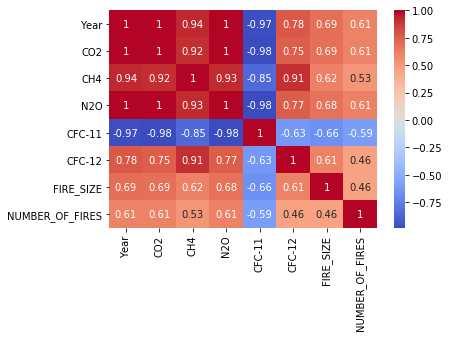

In [22]:
sns.heatmap(all_correlations, annot = True,
fmt='.2g',cmap= 'coolwarm')
plt.savefig('heatmap_1.jpg')

## Correlation scatterplot of CO2 against the average fire size

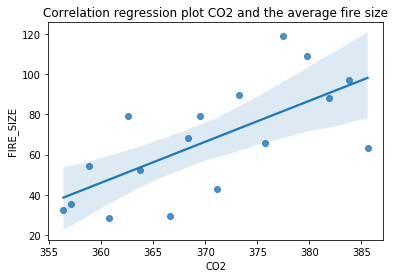

In [23]:
scatter_1 = sns.regplot(x='CO2', y='FIRE_SIZE', data=full_merge).set_title('Correlation regression plot CO2 and the average fire size')


## Correlation plots of six variables from merged dataframe against the average fire size

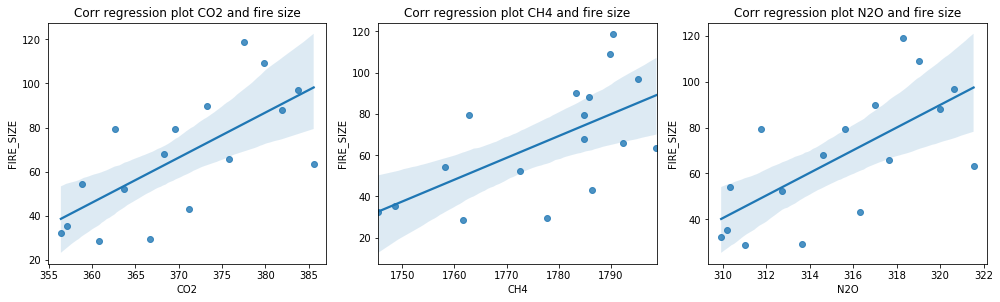

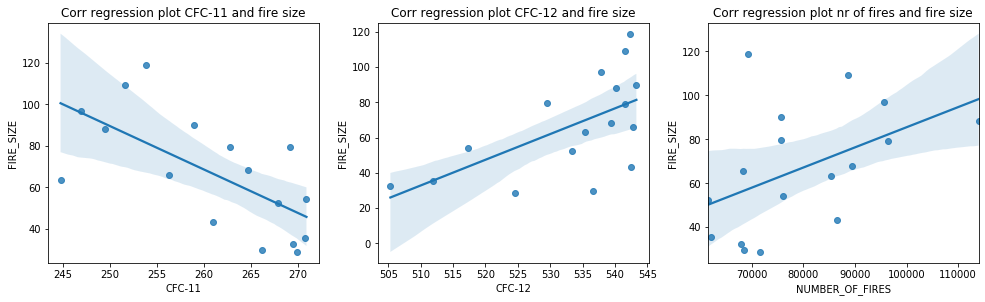

In [24]:
fig, axs = plt.subplots(ncols=3, figsize=(14,4.3))
sns.regplot(x='CO2', y='FIRE_SIZE', data=full_merge, ax=axs[0]).set_title('Corr regression plot CO2 and fire size')
sns.regplot(x='CH4', y='FIRE_SIZE', data=full_merge, ax=axs[1]).set_title('Corr regression plot CH4 and fire size')
sns.regplot(x='N2O', y='FIRE_SIZE', data=full_merge, ax=axs[2]).set_title('Corr regression plot N2O and fire size')
fig.tight_layout()

fig, axs = plt.subplots(ncols=3, figsize=(14,4.3))
sns.regplot(x='CFC-11', y='FIRE_SIZE', data=full_merge, ax=axs[0]).set_title('Corr regression plot CFC-11 and fire size')
sns.regplot(x='CFC-12', y='FIRE_SIZE', data=full_merge, ax=axs[1]).set_title('Corr regression plot CFC-12 and fire size')
sns.regplot(x='NUMBER_OF_FIRES', y='FIRE_SIZE', data=full_merge, ax=axs[2]).set_title('Corr regression plot nr of fires and fire size')
fig.tight_layout()


## Correlation plots of six variables from merged dataframe against the number of fires per year

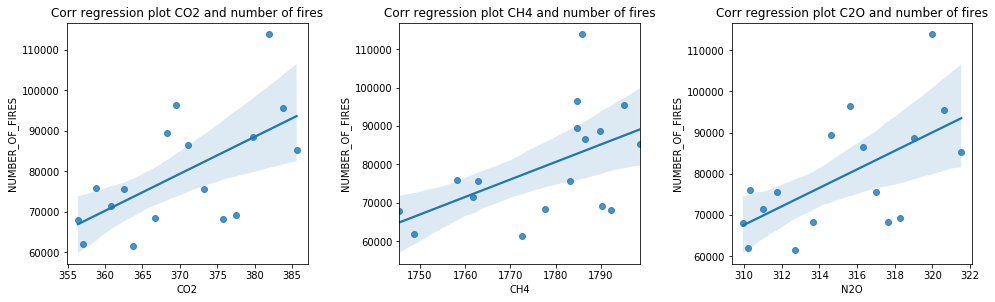

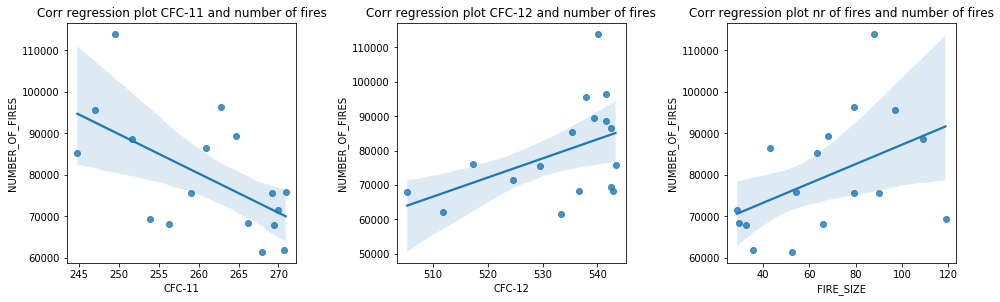

In [25]:
fig, axs = plt.subplots(ncols=3, figsize=(14,4.3))
sns.regplot(x='CO2', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[0]).set_title('Corr regression plot CO2 and number of fires')
sns.regplot(x='CH4', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[1]).set_title('Corr regression plot CH4 and number of fires')
sns.regplot(x='N2O', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[2]).set_title('Corr regression plot C2O and number of fires')
fig.tight_layout()

fig, axs = plt.subplots(ncols=3, figsize=(14,4.3))
sns.regplot(x='CFC-11', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[0]).set_title('Corr regression plot CFC-11 and number of fires')
sns.regplot(x='CFC-12', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[1]).set_title('Corr regression plot CFC-12 and number of fires')
sns.regplot(x='FIRE_SIZE', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[2]).set_title('Corr regression plot nr of fires and number of fires')
fig.tight_layout()


### Correlation plots between all variables from merged dataframe 


The following figure shows scatterplots between all variables from dataframe full_merge. 
The seaborn PairGrid method is able to display any correlation between any two variables. 

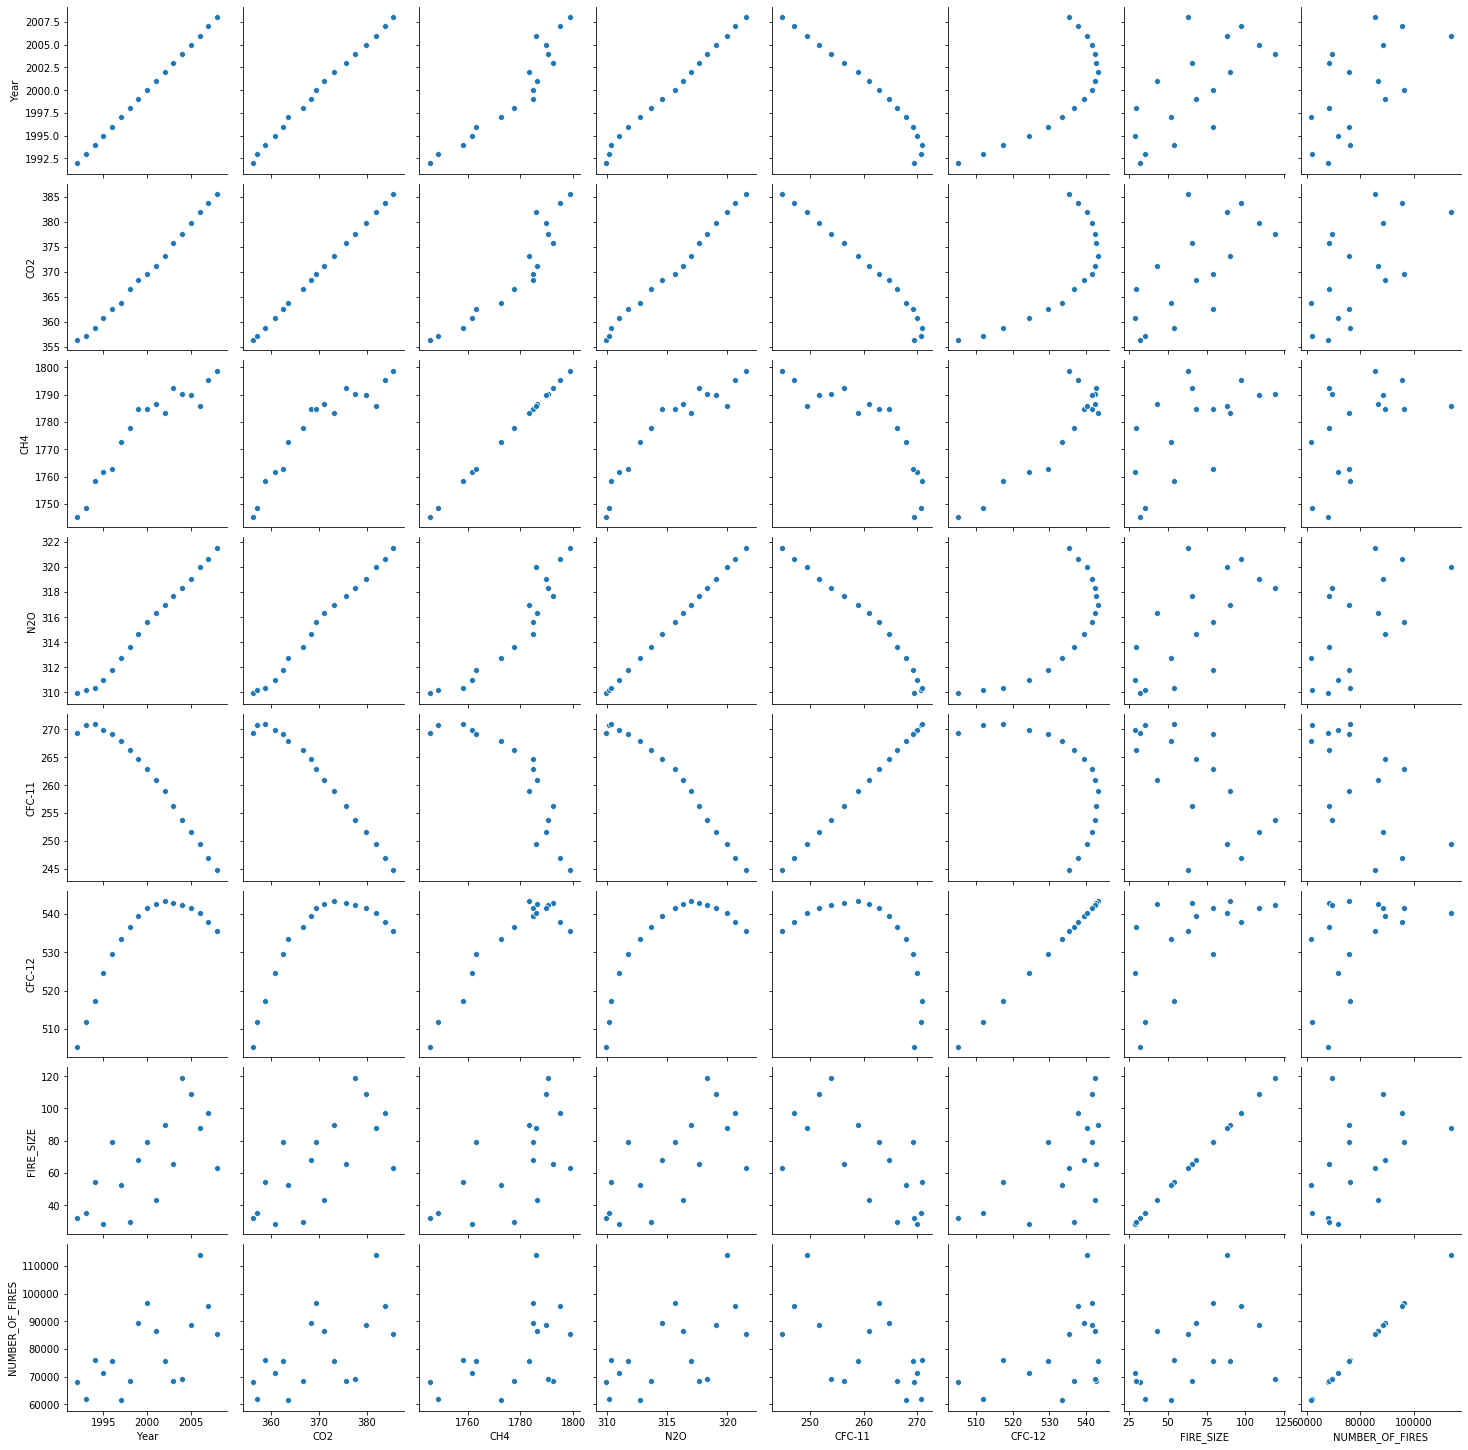

In [26]:
g = sns.PairGrid(full_merge)
g.map(sns.scatterplot)

## Boxplot visualization to detect outliers 

The data from the merged dataframe can also be displayed in boxplot diagrams. These visualisations show for each variable the distribution of all the data values. 50% of all data values are situated in the colored shaped box. The lines on the left and of the right of the colored box indicate the lower 25% and upper 25% data values. Each area in the boxplot is therefore a quartile. If the quartile is relatively small, than data is situated among a smaller interval within that quartile. 

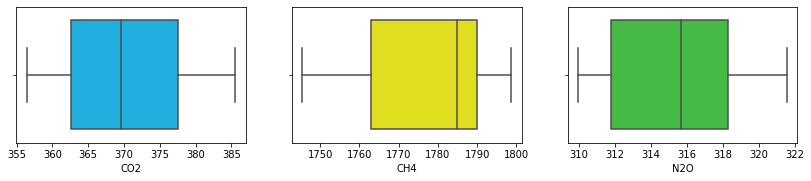

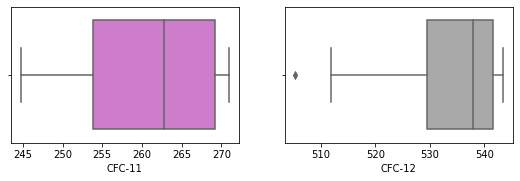

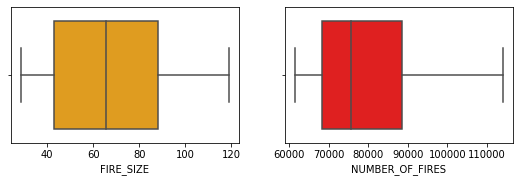

In [27]:
fig, axs = plt.subplots(1, 3, figsize=(14,2.5))
sns.boxplot(x="CO2", data=full_merge, color='deepskyblue', ax=axs[0])
sns.boxplot(x="CH4", data=full_merge, color='yellow', ax=axs[1])
sns.boxplot(x="N2O", data=full_merge, color='limegreen', ax=axs[2])

fig, axs = plt.subplots(1, 2, figsize=(9,2.5))
sns.boxplot(x="CFC-11", data=full_merge, color='orchid', ax=axs[0])
sns.boxplot(x="CFC-12", data=full_merge, color='darkgray', ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(9,2.5))
sns.boxplot(x="FIRE_SIZE", data=full_merge, color='orange', ax=axs[0])
sns.boxplot(x="NUMBER_OF_FIRES", data=full_merge, color='red', ax=axs[1])


END OF NOTEBOOK